In [ ]:
pip install --pre --upgrade --extra-index-url=https://packages.dea.ga.gov.au/ datacube

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from dea_tools.plotting import xr_animation

/env/lib/python3.6/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.7.2-CAPI-1.11.0 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
import datacube
import datetime
from datacube.model import Range, Dataset
from datacube.api.query import GroupBy
from datacube.utils.dates import normalise_dt
import collections

dc = datacube.Datacube()

#################
# Find datasets #
#################

y, x = -33.965, 151.20

# Set query
query = {
    'x': (x - 0.05, x + 0.05),
    'y': (y - 0.03, y + 0.03),
    'time': ('1987', '2021')
}

# Find datasets for all three geomedians
dss_ls5 = dc.find_datasets(product='ls5_nbart_geomedian_annual', **query)
dss_ls7 = dc.find_datasets(product='ls7_nbart_geomedian_annual', **query)
dss_ls8 = dc.find_datasets(product='ls8_nbart_geomedian_annual', **query)

##################
# Custom GroupBy #
##################

def _extract_time_from_ds(ds: Dataset) -> datetime.datetime:
    return normalise_dt(ds.center_time)

def sort_by_platform(ds):
    order = {'LANDSAT_5': 2, 'LANDSAT_7': 3, 'LANDSAT_8': 1}
    return order[ds.metadata.platform]

platform_grouper = GroupBy(dimension='time',
                           group_by_func=_extract_time_from_ds,
                           units='seconds since 1970-01-01 00:00:00',
                           sort_key=sort_by_platform)

#############
# Load data #
#############

ds = dc.load(datasets=dss_ls5 + dss_ls7 + dss_ls8,
             measurements=['red', 'green', 'blue'],
             group_by=platform_grouper,
             **query)
ds

<xarray.Dataset>
Dimensions:      (time: 33, x: 404, y: 320)
Coordinates:
  * time         (time) datetime64[ns] 1988-01-01 1989-01-01 ... 2020-01-01
  * y            (y) float64 -3.835e+06 -3.835e+06 ... -3.843e+06 -3.843e+06
  * x            (x) float64 1.753e+06 1.754e+06 ... 1.764e+06 1.764e+06
    spatial_ref  int32 3577
Data variables:
    red          (time, y, x) int16 1041 1287 1532 1243 1180 ... 139 143 147 148
    green        (time, y, x) int16 973 1150 1334 1159 1069 ... 223 236 240 239
    blue         (time, y, x) int16 689 812 976 813 774 ... 310 320 335 339 339
Attributes:
    crs:           EPSG:3577
    grid_mapping:  spatial_ref

Exporting animation to flipbook.gif


  0%|          | 0/33 (0.0 seconds remaining at ? frames/s)

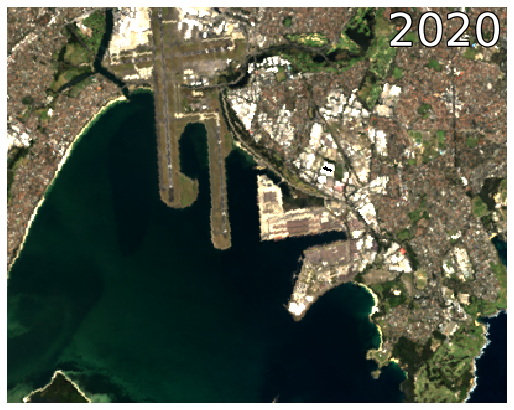

In [3]:
xr_animation(ds.rolling(time=5, center=True, min_periods=1).median(), 
             bands=['red', 'green', 'blue'], 
             output_path='flipbook.gif', 
             interval=100, 
             show_date='%Y', 
             annotation_kwargs={'fontsize': 45})

## Create flipbook

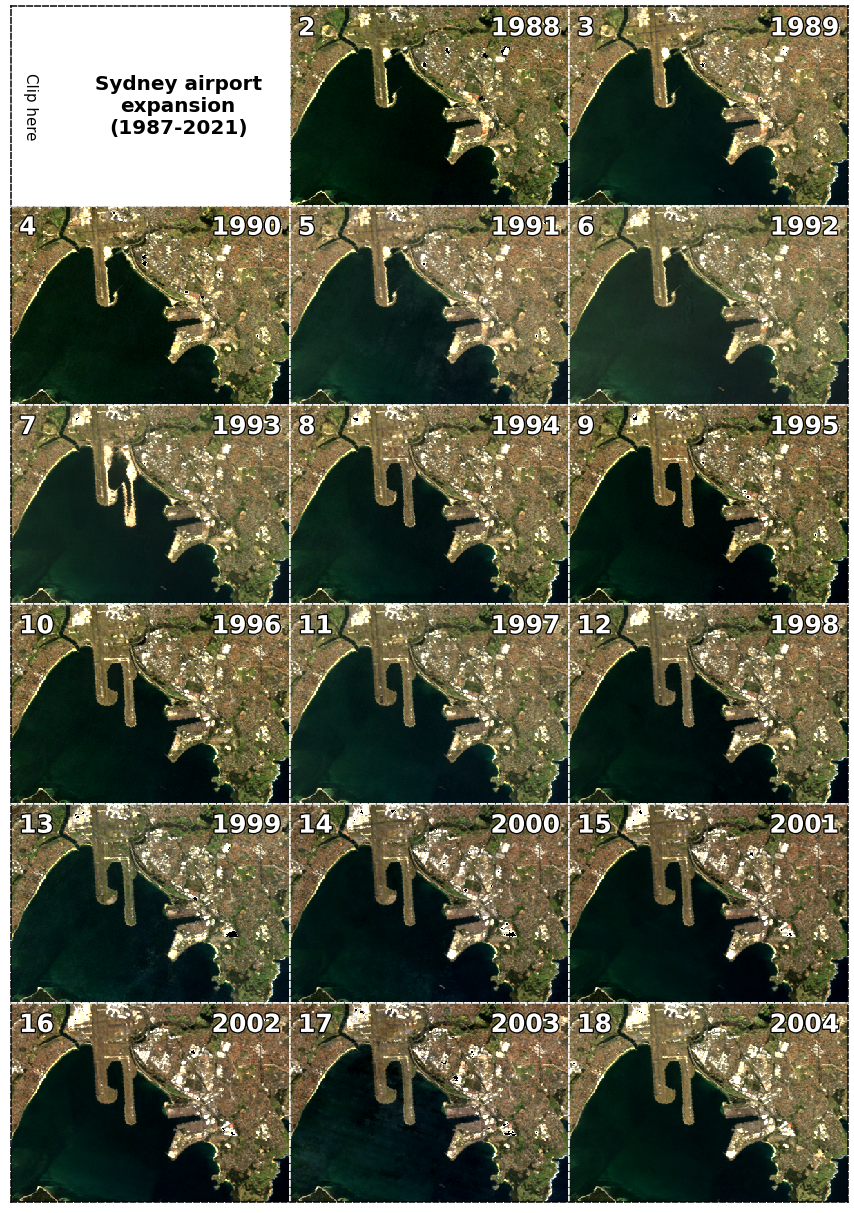

In [28]:
def page_1(ds):

    fig, axes = plt.subplots(6, 3, figsize=(15, 22))
    axes = axes.flatten()
    fig.subplots_adjust(hspace=0, wspace=0)

    # Set default parameters
    outline = [PathEffects.withStroke(linewidth=2.5, foreground='black')]
    
    # Default text stype
    text_style = dict(path_effects=outline,
                    color='white',
                    fontsize=25,
                    fontweight='bold')

    # Loop through each frame
    for i, ax in enumerate(axes):

        # Plot data
        if i == 0:

            # Add frame annotation
            ax.text(0.07,
                    0.5,
                    'Clip here',
                    rotation=270,
                    verticalalignment='center',
                    horizontalalignment='center',
                    transform=ax.transAxes,
                    color='black',
                    fontsize=15)

            # Add frame annotation
            ax.text(0.6,
                    0.5,
                    'Sydney airport\nexpansion\n(1987-2021)',
                    verticalalignment='center',
                    horizontalalignment='center',
                    transform=ax.transAxes,
                    color='black',
                    fontsize=20,
                    fontweight='bold')

        else:

            # Pull out relevant year
            ds_i = ds.isel(time=i-1).to_array()
            year = ds_i.time.dt.year.item()

            # Plot and remove automated title
            ds_i.plot.imshow(ax=ax, vmin=200, vmax=2000)
            ax.set_title('')

            # Add frame annotation
            ax.text(0.03,
                    0.95,
                    i + 1,
                    verticalalignment='top',
                    horizontalalignment='left',
                    transform=ax.transAxes,
                    **text_style)

            # Add year text annotation
            ax.text(0.97,
                    0.95,
                    year,
                    verticalalignment='top',
                    horizontalalignment='right',
                    transform=ax.transAxes,
                    **text_style)

        # Set spines to dashed
        for spine in ax.spines.values():
            spine.set_linestyle('--')
            spine.set_linewidth(1.5)
            spine.set_edgecolor('white')

        if i < 3:
            ax.spines['top'].set_edgecolor('black')
        if i >= 15:
            ax.spines['bottom'].set_edgecolor('black')
        if i % 3 == 0:
            ax.spines['left'].set_edgecolor('black')
        if i % 3 == 2:
            ax.spines['right'].set_edgecolor('black')

        # Hide axes
        ax.axes.xaxis.set_visible(False)
        ax.axes.yaxis.set_visible(False)

    fig.savefig('flipbook_page1.png', bbox_inches='tight', pad_inches=0.35)
    
page_1(ds=ds)

In [29]:
from matplotlib.backends.backend_pdf import PdfPage

ImportError: cannot import name 'PdfPage'

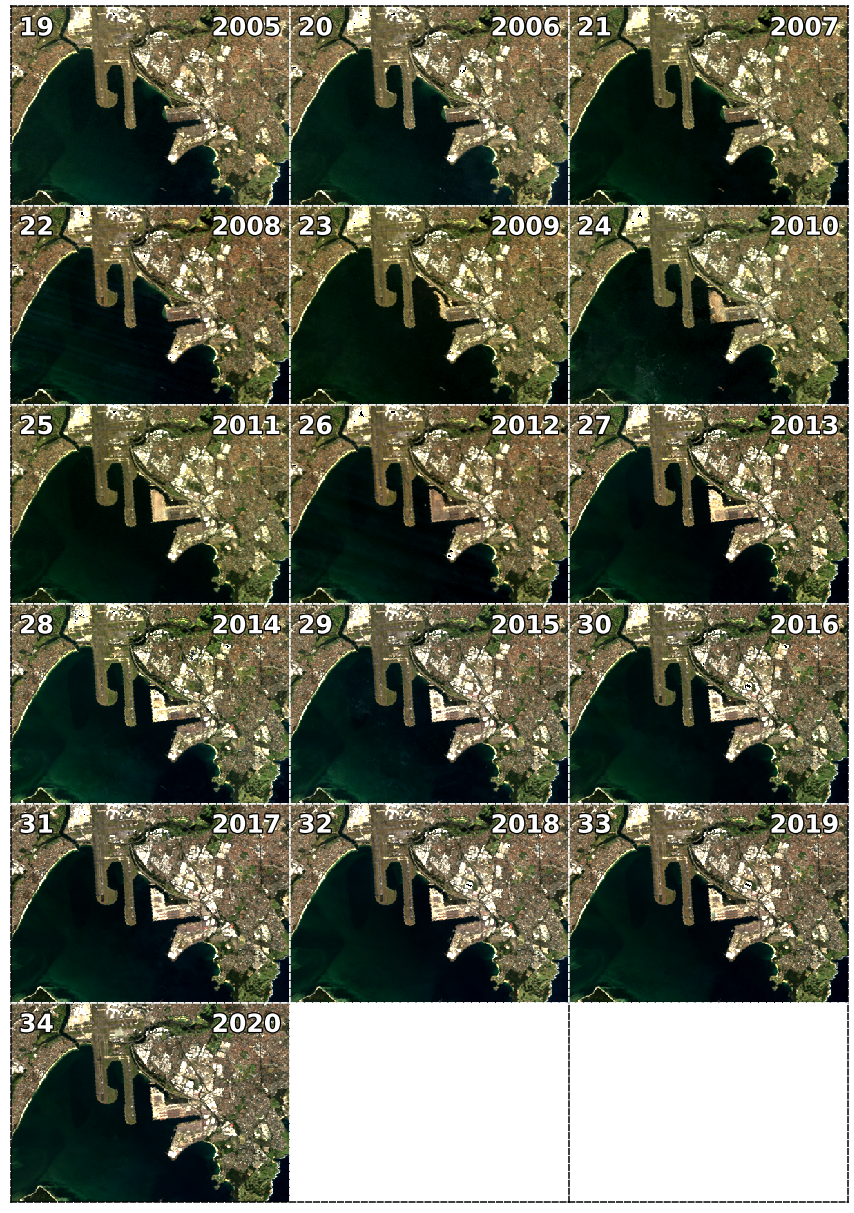

In [27]:
def page_2(ds):

    fig, axes = plt.subplots(6, 3, figsize=(15, 22))
    axes = axes.flatten()
    fig.subplots_adjust(hspace=0, wspace=0)

    # Set default parameters
    outline = [PathEffects.withStroke(linewidth=2.5, foreground='black')]
    
    # Default text stype
    text_style = dict(path_effects=outline,
                    color='white',
                    fontsize=25,
                    fontweight='bold')

    # Loop through each frame
    for i, ax in enumerate(axes, 18):

        # Plot data
        if i < 34:

            # Pull out relevant year
            ds_i = ds.isel(time=i-1).to_array()
            year = ds_i.time.dt.year.item()

            # Plot and remove automated title
            ds_i.plot.imshow(ax=ax, vmin=200, vmax=2000)
            ax.set_title('')

            # Add frame annotation
            ax.text(0.03,
                    0.95,
                    i + 1,
                    verticalalignment='top',
                    horizontalalignment='left',
                    transform=ax.transAxes,
                    **text_style)

            # Add year text annotation
            ax.text(0.97,
                    0.95,
                    year,
                    verticalalignment='top',
                    horizontalalignment='right',
                    transform=ax.transAxes,
                    **text_style)

        # Set spines to dashed
        for spine in ax.spines.values():
            spine.set_linestyle('--')
            spine.set_linewidth(1.5)
            spine.set_edgecolor('white')

        if i < 21:
            ax.spines['top'].set_edgecolor('black')
        if i >= 33:
            ax.spines['bottom'].set_edgecolor('black')
        if (i % 3 == 0) | (i == 35):
            ax.spines['left'].set_edgecolor('black')
        if i % 3 == 2:
            ax.spines['right'].set_edgecolor('black')

        # Hide axes
        ax.axes.xaxis.set_visible(False)
        ax.axes.yaxis.set_visible(False)

    fig.savefig('flipbook_page2.png', bbox_inches='tight', pad_inches=0.35)
    
page_2(ds=ds)